In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.6/749.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━


image 1/1 /content/WhatsApp Image 2024-03-31 at 11.01.56_342596b8.jpg: 480x640 1 face, 1 female, 537.5ms
Speed: 31.7ms preprocess, 537.5ms inference, 4065.4ms postprocess per image at shape (1, 3, 480, 640)


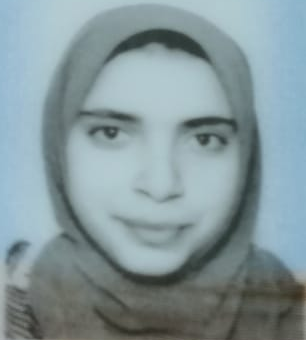

(<PIL.Image.Image image mode=RGB size=306x340>, 'female')

In [2]:
from ultralytics import YOLO
from PIL import Image
from IPython.display import display

def crop_image(image_path, start_point, end_point):
    # Open the image
    image = Image.open(image_path)

    # Define the region of interest (ROI) using diagonal coordinates
    left = min(start_point[0], end_point[0])
    top = min(start_point[1], end_point[1])
    right = max(start_point[0], end_point[0])
    bottom = max(start_point[1], end_point[1])
    roi = (left, top, right, bottom)

    # Crop the image using the ROI
    cropped_image = image.crop(roi)

    return cropped_image

def get_detections(model_path,image_path):
  model = YOLO(model_path)
  source = image_path
  # Run inference on the source
  results = model(source)  # generator of Results objects
  detected_classes = {}

  for result in results:
    boxes = result.boxes.cpu().numpy()  # get boxes on cpu in numpy
    box_num = 0
    for box in boxes:
      cls = result.names[int(box.cls[0])]
      xyxy = list(box.numpy().xyxy[0]) # gets the diagonal of the detected object's rectangle [x_min, y_min, x_max, y_max]
      if cls == "face":
        detected_classes[box_num] = {"cls":cls, "xyxy":xyxy}
      xyxy = list(box.numpy().xyxy[0])
      if cls == "female":
        detected_classes[box_num] = {"cls":cls, "xyxy":xyxy}
      xyxy = list(box.numpy().xyxy[0])
      if cls == "male":
        detected_classes[box_num] = {"cls":cls, "xyxy":xyxy}
      box_num+=1

  cropped_image = None # the final cropped image
  sex = None # the sex of the person in the image which will be useful when we come up with random names for this person

  for key in detected_classes:
    if detected_classes[key]['cls'] == 'face':
      xyxy = detected_classes[key]['xyxy']
      # Define rectangle parameters
      start_point = (xyxy[0], xyxy[1])  # Top left corner
      end_point = (xyxy[2], xyxy[3]) # bottom right corner
      cropped_image = crop_image(image_path, start_point, end_point)
      display(cropped_image)
    elif detected_classes[key]['cls'] == 'female' or detected_classes[key]['cls'] == 'male':
      sex = detected_classes[key]['cls']

  return cropped_image, sex



cropped_image, sex = get_detections('/content/final_model.pt','/content/WhatsApp Image 2024-03-31 at 11.01.56_342596b8.jpg')

cropped_image, sex

In [31]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter
from IPython.display import display
from random import randint

def add_image_details(font_file, base_image_path, first_name, second_name, address_upper, address_lower, id, birth_date, issue_number, face_image):
    # Open the base_image file
    image = Image.open(base_image_path).convert("RGBA")
    width, height = image.size

    # Initialize the drawing context
    draw = ImageDraw.Draw(image)

    # draw the first_name
    first_name_font = ImageFont.truetype(font_file, 45)
    first_name_width, _ = draw.textsize(first_name, first_name_font)
    first_name_position = (width - first_name_width - 100, 200)
    first_name_text_color = (0, 0, 0)
    draw.text(first_name_position, first_name, fill=first_name_text_color, font=first_name_font)

    # draw the second_name
    second_name_font = ImageFont.truetype(font_file, 45)
    second_name_width, _ = draw.textsize(second_name, second_name_font)
    second_name_position = (width - second_name_width - 100, 250)
    second_name_text_color = (0, 0, 0)
    draw.text(second_name_position, second_name, fill=second_name_text_color, font=second_name_font)

    # draw the address_upper
    address_upper_font = ImageFont.truetype(font_file, 45)
    address_upper_width, _ = draw.textsize(address_upper, address_upper_font)
    address_upper_position = (width - address_upper_width - 100, 330)
    address_upper_text_color = (0, 0, 0)
    draw.text(address_upper_position, address_upper, fill=address_upper_text_color, font=address_upper_font)

    # draw the address_lower
    address_lower_font = ImageFont.truetype(font_file, 45)
    address_lower_width, _ = draw.textsize(address_lower, address_lower_font)
    address_lower_position = (width - address_lower_width - 100, 380)
    address_lower_text_color = (0, 0, 0)
    draw.text(address_lower_position, address_lower, fill=address_lower_text_color, font=address_lower_font)

    # draw the id
    id_font = ImageFont.truetype(font_file, 60)
    id_width, _ = draw.textsize(id, id_font)
    id_position = (width - id_width - 100, 500)
    id_text_color = (0, 0, 0)
    draw.text(id_position, id, fill=id_text_color, font=id_font)

    # draw the birth_date with transparency
    birth_date_font = ImageFont.truetype(font_file, 60)
    birth_date_position = (70, 480)
    birth_date_text_color = (0, 0, 0, int(0.77*255))  # RGBA color with alpha value for transparency
    draw.text(birth_date_position, birth_date, fill=birth_date_text_color, font=birth_date_font)

    # draw the issue_number
    issue_number_font = ImageFont.truetype(font_file, 30)
    issue_number_position = (125, 590)
    issue_number_text_color = (0, 0, 0)
    draw.text(issue_number_position, issue_number, fill=issue_number_text_color, font=issue_number_font)

    # draw the face image
    desired_size = (230, 250)
    image_to_draw_resized = face_image.resize(desired_size).convert("RGBA")
    position = (50, 50)
    image.paste(image_to_draw_resized, position, mask=image_to_draw_resized)

    display(image)

<ipython-input-31-e7e84451017d>:15: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  first_name_width, _ = draw.textsize(first_name, first_name_font)
<ipython-input-31-e7e84451017d>:22: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  second_name_width, _ = draw.textsize(second_name, second_name_font)
<ipython-input-31-e7e84451017d>:29: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  address_upper_width, _ = draw.textsize(address_upper, address_upper_font)
<ipython-input-31-e7e84451017d>:36: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  address_lower_width, _ = draw.textsize(address_lower, address_lower_font)
<ipython-input-31-e7e84451017d>:43: DeprecationWarning: textsiz

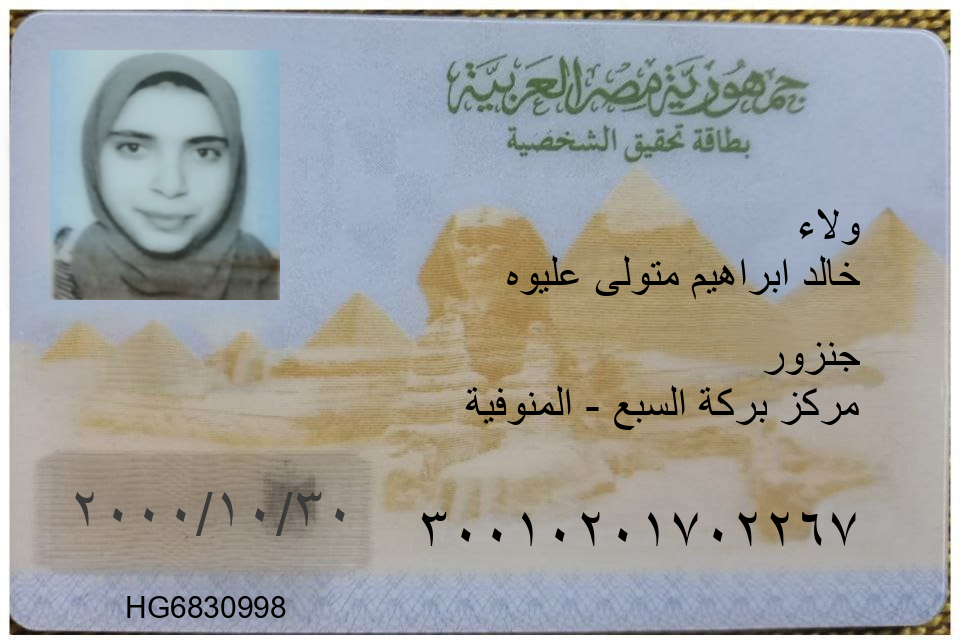

In [32]:

add_image_details(font_file='/content/alfont_com_arial-1.ttf',
                  base_image_path='/content/WhatsApp Image 2024-04-01 at 14.21.17_85469998.jpg',
                  first_name='ولاء',
                  second_name='خالد ابراهيم متولى عليوه',
                  address_upper='جنزور',
                  address_lower='مركز بركة السبع - المنوفية',
                  id='۳۰۰۱۰۲۰۱۷۰۲۲٦۷',
                  birth_date='۲۰۰۰/۱۰/۳۰',
                  issue_number='HG6830998',
                  face_image=cropped_image)